<a href="https://colab.research.google.com/github/sjmoon125/opensource_assignment/blob/main/KNU_OP_%EC%83%9D%EC%84%B1AI_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **설정**

Gemini API용 Python SDK는 google-generativeai 패키지를 설치합니다. pip를 사용하여 종속 항목을 설치합니다.

In [ ]:
pip install -q -U google-generativeai

필요한 패키지를 가져옵니다.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

# **API 키 설정**

Gemini API를 사용하려면 먼저 API 키를 받아야 합니다. 만약 없는 경우 Google AI Studio에서 클릭 한 번으로 키를 만듭니다.

https://aistudio.google.com/app/apikey?hl=ko

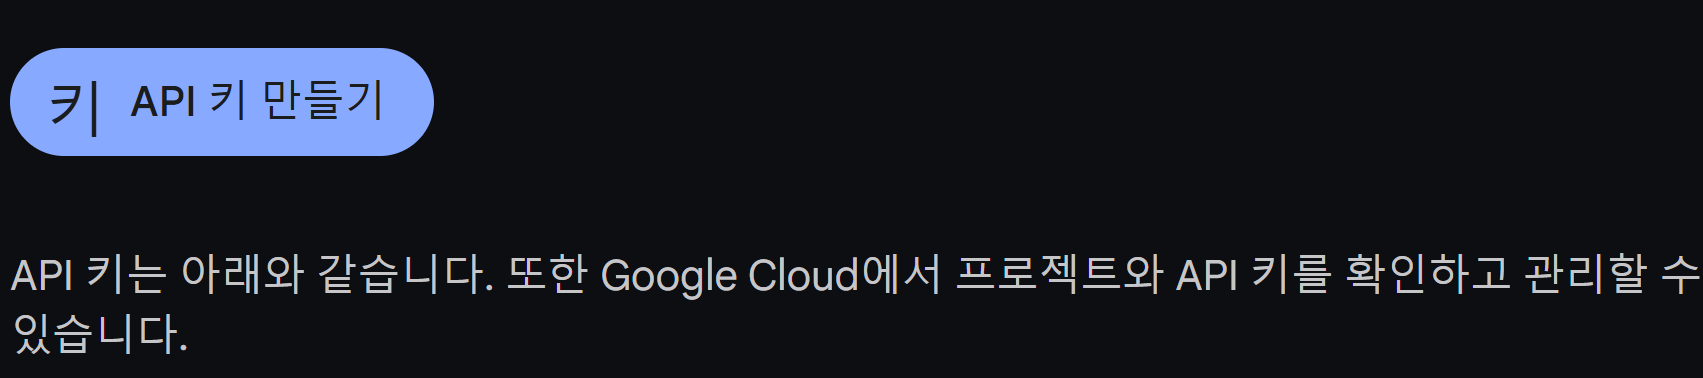

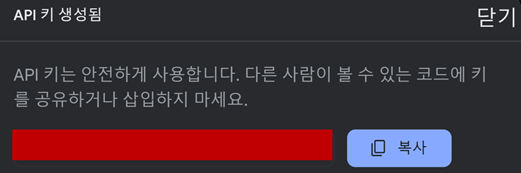

Colab에서 'recommended' 아래의 보안 비밀 관리자에 키를 추가하세요. 왼쪽 패널에 표시됩니다. 이름을 GOOGLE_API_KEY로 지정합니다.

API 키를 확보하면 이를 SDK에 전달합니다. 여기에는 두 가지 방법이 있습니다.

*   키를 GOOGLE_API_KEY 환경 변수에 입력합니다. SDK는 자동으로 가져옵니다.
*   키를 genai.configure(api_key=...)에 전달

In [ ]:
# genai.configure(api_key=GOOGLE_API_KEY)
YOUR_API_KEY = '복사해서 붙여 넣어주세요'
genai.configure(api_key=YOUR_API_KEY)

# **모델 나열**
이제 Gemini API를 호출할 준비가 되었습니다. list_models 앱을 사용하여 사용 가능한 Gemini 모델:

*   gemini-1.5-flash: 가장 빠른 멀티 모달 모델
*   gemini-1.5-pro: Google의 가장 강력하고 지능적인 멀티모달 모델

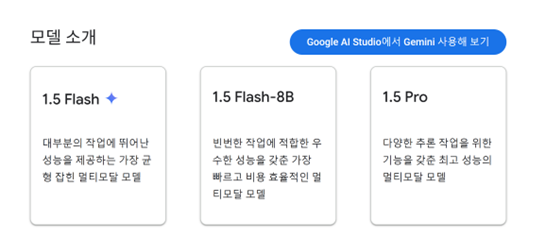

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121


# **텍스트 입력에서 텍스트 생성**

텍스트 전용 프롬프트의 경우 Gemini 1.5 모델 또는 Gemini 1.0 Pro 모델을 사용하세요.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-flash')

generate_content 메서드는 다음을 비롯한 다양한 사용 사례를 처리할 수 있습니다. 멀티턴 채팅 및 멀티모달 입력을 지원합니다. 사용 가능한 모델은 입력으로 텍스트와 이미지만 지원하고 출력됩니다.

가장 간단한 경우 프롬프트 문자열을 'GenerativeModel.generate_content' 메서드를 사용하여 축소하도록 요청합니다.



In [ ]:
response = model.generate_content("강원대 곰두리는 무엇인가요?")

In [ ]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "\uac15\uc6d0\ub300 \uacf0\ub450\ub9ac\ub294 \uac15\uc6d0\ub300\ud559\uad50\uc758 \uacf5\uc2dd \ub9c8\uc2a4\ucf54\ud2b8\uc785\ub2c8\ub2e4.  \uacf0\uc744 \ubaa8\ud2f0\ube0c\ub85c \ud558\uc600\uace0,  \ub300\uccb4\ub85c \uce5c\uadfc\ud558\uace0 \uadc0\uc5ec\uc6b4 \ub514\uc790\uc778\uc73c\ub85c \ud45c\ud604\ub429\ub2c8\ub2e4.  \ub2e8\uc21c\ud788 \uc774\ubbf8\uc9c0 \ud558\ub098\uac00 \uc544\ub2c8\ub77c,  \ub300\ud559 \ud589\uc0ac\ub098 \ud64d\ubcf4\ubb3c \ub4f1\uc5d0 \ub2e4\uc591\ud55c \ud615\ud0dc\ub85c \ub4f1\uc7a5\ud558\uc5ec \uac15\uc6d0\ub300\ud559\uad50\ub97c \uc0c1\uc9d5\ud558\ub294 \uc5ed\ud560\uc744 \ud569\ub2c8\ub2e4.  \uc815\ud655\ud55c \ub514\uc790\uc778\uc740 \uc2dc\ub300\uc5d0 \ub530\ub77c \uc870\uae08\uc529 \ubcc0\ud654\ud560 \uc218 \uc788\uc9c0\ub

In [ ]:
to_markdown(response.text)

> 강원대 곰두리는 강원대학교의 공식 마스코트입니다.  곰을 모티브로 하였고,  대체로 친근하고 귀여운 디자인으로 표현됩니다.  단순히 이미지 하나가 아니라,  대학 행사나 홍보물 등에 다양한 형태로 등장하여 강원대학교를 상징하는 역할을 합니다.  정확한 디자인은 시대에 따라 조금씩 변화할 수 있지만,  항상 곰의 형태를 유지하고 있습니다.


**메서드: models.generateContent**는 입력 GenerateContentRequest가 주어지면 모델 응답을 생성합니다. 이에 대한 매개변수 설명은 아래와 같습니다.

https://ai.google.dev/api/generate-content?hl=ko



In [ ]:
# 생성 답변 json 형태로 변경
my_generationConfig = {"response_mime_type": "application/json"}

# 모델 설정 반영
model = genai.GenerativeModel('gemini-1.5-flash', generation_config=my_generationConfig)

# 생성
response = model.generate_content("강원대 곰두리는 무엇인가요?")

In [ ]:
to_markdown(response.text)

> {"강원대_곰두리": "강원대학교의 마스코트 캐릭터입니다."}

# **구글 제미나이 API 3가지 기본 사용법**

구글 제미나이 API를 사용하여 제미나이와 메시지를 주고받을 수 있는 방식은 크게 싱글턴 한 가지와 멀티턴 두 가지 를 합해 모두 3가지 형태가 존재합니다. 이 중 싱글턴은 한 번의 질의/응답으로 완결되는 형태이며, 따라서 텍스트를 완성하거나 인공지능에게 한 번의 명령으로 원하는 결과를 얻고자 할 때 적합합니다. 이에 반해 멀티턴은 사용자와 인공지능이 여러 차례 메시지를 주고받을 수 있는 형태입니다. 이런 특징 때문에 멀티턴은 대화형 인공지능 개발에 자주 사용됩니다.

# **사용법 1 - 싱글턴으로 메시지 주고받기**

구글 제미나이 API에서 제공하는 3가지 방식 중 싱글턴 방식이 가장 사용하기 쉽습니다. 위에서 진행하였던 예시 코드가 싱글턴 방식입니다.

# **사용법 2 - 멀티턴으로 메시지 주고받기-1**

앞에서, 멀티턴은 여러 차례 메시지를 주고받는 대화형 인공지능에 적합한 방식이라고 설명했습니다. 이렇게, 여러 차례 대화를 주고받기 위해서는 대화 이력을 담고 있는 공간이 필요합니다. 이것을 위해 구글 제미나이에서는 ChatSession 객체를 제공합니다. 다음은 ChatSession 객체를 사용하여 멀티턴 대화를 나누는 예제입니다.

In [ ]:
#ChatSession 객체 반환
chat_session = model.start_chat(history=[])

user_queries = ["강원대에 대해 한 문장으로 짧게 설명하세요.", "근처 맛집이 무엇이 있는지 짧게 말해보세요,"]
for user_query in user_queries:
    print(f'[사용자]: {user_query}')
    response = chat_session.send_message(user_query)
    print(f'[모델]: {response.text}')

[사용자]: 강원대에 대해 한 문장으로 짧게 설명하세요.
[모델]: {"description": "강원대학교는 강원도에 위치한 국립대학교입니다."}
[사용자]: 근처 맛집이 무엇이 있는지 짧게 말해보세요,
[모델]: {"맛집": ["춘천닭갈비", "막국수", "황태해장국"]}


앞의 예제와 가장 큰 차이점은 model 의 start_chat 메서드를 호출해서 ChatSession 객체를 받아오고 이것을 통해 메시지를 전달하는 부분입니다. 이때 history라는 리스트를 초기화하고 있는데, 바로 이곳이 대화 이력이 쌓이는 공간입니다. 이렇게 대화 세션이라는 장치를 통해 대화의 이력을 유지하기 때문에 두 번째 사용자 질의처럼 주어(인공지능)가 생략된 질의에 대해서도 앞의 대화를 참조해서 적절한 응답을 생성할 수 있습니다.

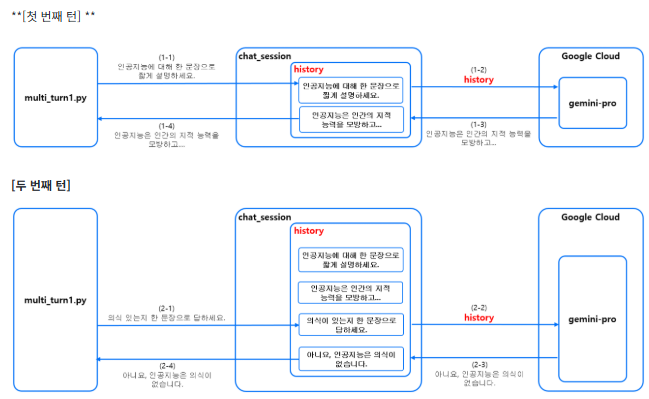

# **사용법 3 - 멀티턴으로 메시지 주고받기-2**

다음은 멀티턴으로 메시지를 주고받는 두 번째 방법입니다.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-flash')
user_queries = [{'role':'user', 'parts': ["강원대에 대해 한 문장으로 짧게 설명하세요."]},
                {'role':'user', 'parts': ["무엇이 유명한지 한 문장으로 답하세요."]}
            ]
history = []
for user_query in user_queries:
    history.append(user_query)
    print(f'[사용자]: {user_query["parts"][0]}')
    response = model.generate_content(history)
    print(f'[모델]: {response.text}')
    history.append(response.candidates[0].content)

[사용자]: 강원대에 대해 한 문장으로 짧게 설명하세요.
[모델]: 강원대학교는 강원도에 위치한 국립대학교입니다.

[사용자]: 무엇이 유명한지 한 문장으로 답하세요.
[모델]: 강원대학교는 춘천캠퍼스의 아름다운 자연환경과 농업, 수의학, 산림과학 등 특성화된 분야로 유명합니다.



싱글턴 방식의 메서드인 model.generate_content를 사용하지만, 대화 이력은 사용자 프로그램에서 직접 관리하는 형태입니다. 이렇게 사용자 프로그램이 관리하는 대화 이력을 model.generate_content를 호출할 때마다 인자값으로 전달함으로써, 비록 싱글턴 방식의 메서드를 사용하는데도 대화 이력 전체를 참조해서 답변을 생성할 수 있습니다.

이 예제에서 주목할 것은 언어모델이 대화하는 원리입니다. 언어모델은 대화를 나누는 동안 사람처럼 대화 내용을 기억하고 있는 것이 아닙니다. 대화형 언어모델이란 것도 결국 입력값을 받아 출력값을 반환하는 함수에 지나지 않습니다. 단지 입력값에 이전에 나누었던 대화까지 모두 포함되어 있어서 자연스럽게 이어지는 대화처럼 반응하는 것뿐입니다.

# **시스템 인스트럭션 사용하기**

시스템 명령(System Instruction)은 전체 대화에 걸쳐 LLM의 답변을 제어하는 특별한 프롬프트입니다. 사용자는 시스템 명령을 사용함으로써 자신의 요구사항과 사용 사례에 맞게 AI 모델의 작동을 설정할 수 있습니다.

시스템 인스트럭션을 사용하는 가장 대표적인 사례는 챗봇을 개발할 때 페르소나를 설정하는 것입니다. 가령 다음처럼 system_instruction에 설정하고자 하는 특성을 기술하면 됩니다.

In [ ]:
system_instruction = "당신은 강원대 교수입니다. 사용자는 강원대 학부생입니다. 쉽고 친절하게 이야기하면서 대학원 진학을 권유하고 싶습니다. 3문장 이내로 짧게 얘기하세요."
model = genai.GenerativeModel("gemini-1.5-flash", system_instruction=system_instruction)

chat_session = model.start_chat(history=[])  # ChatSession 객체 반환
user_queries = ["진로가 고민돼요", "이유를 좀더 말해줄 수 있나요?", "싫은데요"]

for user_query in user_queries:
    print(f"[사용자]: {user_query}")
    response = chat_session.send_message(user_query)
    print(f"[모델]: {response.text}")

[사용자]: 진로가 고민돼요
[모델]: OO학생, 진로 고민이 많구나.  강원대 대학원 진학을 통해 전문성을 더욱 깊이 있게 탐구하고, 졸업 후 더 넓은 선택지를 확보하는 건 어떨까?  교수님과 상담하며 진로에 대한 고민을 함께 나눠보자.

[사용자]: 이유를 좀더 말해줄 수 있나요?
[모델]: 대학원 진학은 전문적인 지식과 기술을 더욱 심화시켜 졸업 후 경쟁력을 높여줄 수 있어.  또한, 연구 활동 참여를 통해  관심 분야를 깊이 있게 파고들고,  관련 분야 전문가들과의 네트워크를 구축할 수 있지.  그리고 석사 학위는 취업 시 유리한 조건이 될 수도 있고!

[사용자]: 싫은데요
[모델]: 그래,  대학원 진학은  모든 학생에게  필수적인 것은 아니야.  하지만  진로에 대한 고민이 있다면,  대학원 진학이  가능성을 넓히는 하나의 좋은 선택지라는 것을  알아두면 좋을 것 같아.  다른 진로 방향에 대해서도 충분히 이야기 나누고  너에게 가장 잘 맞는 길을 찾도록 도와줄게.  어떤 고민이든 편하게 이야기해도 좋아.



# **입력 구조 살펴보기**

지금까지 구글 제미나이 API를 사용하여 언어모델과 메시지를 주고받는 세 가지 방식을 살펴보았습니다. 각각의 방식마다 메시지 데이터의 형태가 조금씩 달랐지만, 내부적으로는 모두 Content라는 객체로 변환하는 과정을 거쳐 모델에게 전달됩니다.

Content 객체는 메시지 생성의 주체를 나타내는 role과, 메시지를 담고 있는 Parts로 구성됩니다. Role은 'user' 또는 'model'이어야 합니다. 멀티턴 대화에 설정하면 유용하며, 그렇지 않은 경우에는 비워 두거나 설정하지 않아도 됩니다. 구글 제미나이에서는 메시지를 담고 있는 딕셔너리 데이터가 “role”과 “parts” 등 정해진 규칙을 따르고 있다면, 모델에 전송하기 전 내부적으로 Content 객체로 변환하는 과정을 거칩니다. 만일 3번의 대화 턴이 발생했다면, 첫 번째 턴부터 세 번째 턴까지 모두 합해 총 6번(메시지가 누적되는 구조이므로 1+2+3)의 변환 과정을 거쳐야 합니다. 이런 과정 때문에 멀티턴으로 메시지 주고받기-2 방법은 멀티턴으로 메시지 주고받기-1에 비해 Content 객체를 생성하는 만큼의 오버헤드가 더 발생합니다.

Content 내부에 있는 Part 객체는 text 외에도, inline_date, function_call, function_response 형식의 데이터를 가질 수 있습니다. 각각은 이진 데이터, 함수 호출, 함수 응답에 해당하는 데이터입니다.

https://ai.google.dev/api/caching?hl=ko#Content

이처럼 여러 가지 형태의 데이터를 담는 구조로 API가 설계된 까닭은 제미나이가 멀티모달 AI를 추구하기 때문입니다. 멀티모달 AI란 텍스트, 음성, 영상 등 다양한 형식의 데이터를 한 번에 처리하는 인공지능을 뜻합니다. 따라서 멀티모달 AI가 되기 위해서는 멀티모달 모델의 개발과 함께 API 역시 다양한 형태의 데이터를 일관된 구조로 처리할 수 있도록 구성해야 합니다. 앞서 보았던 것처럼 Content 객체는 여러 건의 Part 객체를 갖도록 설계되어 있는데, 이것 역시 멀티모달 AI와 관련이 있습니다. 아래 컴퓨터 비전의 예를 살펴보면 이러한 구조가 왜 필요한지 쉽게 이해할 수 있습니다.



Gemini는 단일 프롬프트에 대해 가능한 여러 대답을 생성할 수 있습니다. 이러한 가능한 응답은 candidates라고 하며, 이러한 응답을 검토하여 가장 적합한 응답을 선택합니다

응답 후보 보기 GenerateContentResponse.candidates:

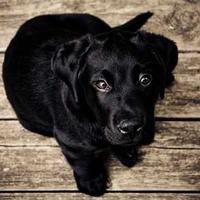

이것은 낡은 나무 바닥에 앉아 있는 새끼 검은색 래브라도 레트리버 사진입니다.


In [ ]:
import google.generativeai as genai
from PIL import Image
import requests
from io import BytesIO

url = "https://picsum.photos/id/237/200"
response = requests.get(url)
image_data = Image.open(BytesIO(response.content))
display(image_data)

model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(["이 그림에 대해 한 문장으로 설명하세요.", image_data])
print(response.text)

# **출력 구조 살펴보기**

구글 제미나이는 모델의 응답 결과를 GenerateContentResponse 객체에 실어서 반환합니다. 앞서 살펴본 예시 코드의 응답 결과를 한 번에 출력하면 다음과 같습니다.

In [ ]:
print(response._result)

candidates {
  content {
    parts {
      text: "이것은 낡은 나무 바닥에 앉아 있는 새끼 검은색 래브라도 레트리버 사진입니다."
    }
    role: "model"
  }
  finish_reason: STOP
  avg_logprobs: -0.468436590830485
}
usage_metadata {
  prompt_token_count: 270
  candidates_token_count: 30
  total_token_count: 300
}



출력을 통해 알 수 있듯이 응답 결과는 크게 candidates 필드와 usage_metadata 필드로 나뉩니다. 이 중 candidates 필드에는 모델의 응답 메시지가 들어 있고, usage_metadata 필드에는 입출력에 사용된 토큰 수가 들어 있습니다.

candidates 필드명이 복수형인 것에서 추측할 수 있듯이, 이 필드는 Candidate 객체를 담고 있는 컬렉션 데이터입니다. 따라서 다음과 같이 반복 구문을 사용할 수 있습니다.

In [ ]:
print(f"건수: {len(response.candidates)}")
print("="*50)
for candidate in response.candidates:
    print(candidate)

건수: 1
content {
  parts {
    text: "이것은 낡은 나무 바닥에 앉아 있는 새끼 검은색 래브라도 레트리버 사진입니다."
  }
  role: "model"
}
finish_reason: STOP
avg_logprobs: -0.468436590830485



이와 같이 응답 메시지를 컬렉션에 담는 까닭은, 한 번의 요청에 대해 여러 건의 응답 결과를 사용자에게 제공하기 위해서입니다. 가령, 제미나이의 웹 버전에서는 한 번의 요청에 대해 세 가지의 답변을 제공합니다. 이런 경우라면 candidates에는 3건의 Candidate 객체가 들어갑니다. 아래 바드 화면의 답안 1, 답안 2, 답안 3이 각각의 Candidate에 해당합니다. 이 중 화면에 전체 내용이 출력되는 대표 메시지가 답안 1에 해당합니다. 다만, 제미나이 API 버전에서는 아직은 1개의 Candidate만 제공합니다.

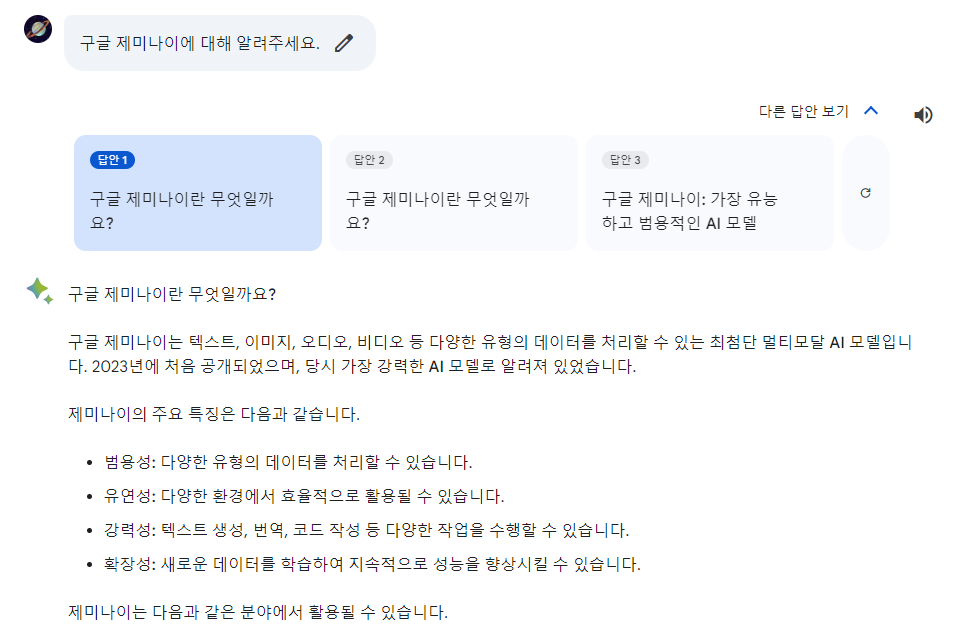

Candidate 객체에는 content 외에도 finish_reason과 safety_ratings 필드가 존재합니다. finish_reason 필드에 담겨 있는 FinishReason 객체(Enum)는 모델이 응답을 종료한 이유를 다음의 형태로 가지고 있습니다.

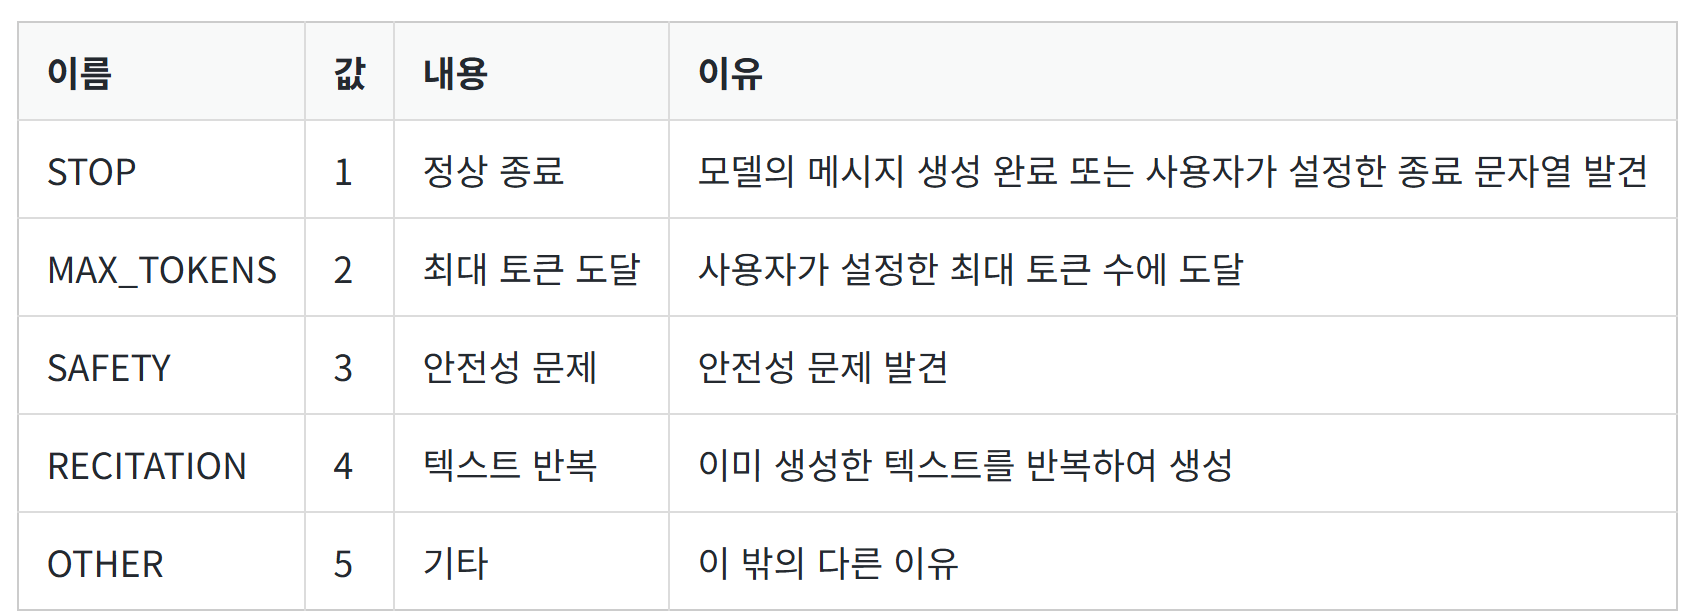

이전 예제에서 finish_reason을 출력하는 코드와 그 결과입니다.

In [ ]:
print(f"finish_reason: {response.candidates[0].finish_reason.name}, {response.candidates[0].finish_reason}")

finish_reason: STOP, 1


모델이 정상적으로 응답 내용을 생성한 후 종료하였으므로 STOP, 1을 출력했습니다. 위의 표에 나와 있는 종료 문자열 발견, 최대 토큰 수 도달, 안전성 문제 발견에 의한 종료는 다음 장에서 관련 주제를 다루면서 자세히 설명하겠습니다.

제미나이는 메시지에 대한 안전성을 “HARASSMENT”, ”HATE SPEECH”, ”SEXUAL EXPLICIT”, ”DANGEROUS” 등 4가지 범주로 체크한 후 각각의 결과를 SafetyRating 객체에 넣어서 반환합니다. safety_ratings 필드는 이 4가지의 안전성 점검 결과를 담고 있는 필드입니다. safety_ratings에 들어 있는 안전성 점검 결과는 모델의 응답에 대한 것입니다. 따라서 모델이 생성한 각각의 메시지에 대해 점검해야 하므로 Candidate 객체 아래에 포함되어 있는 구조를 갖습니다.

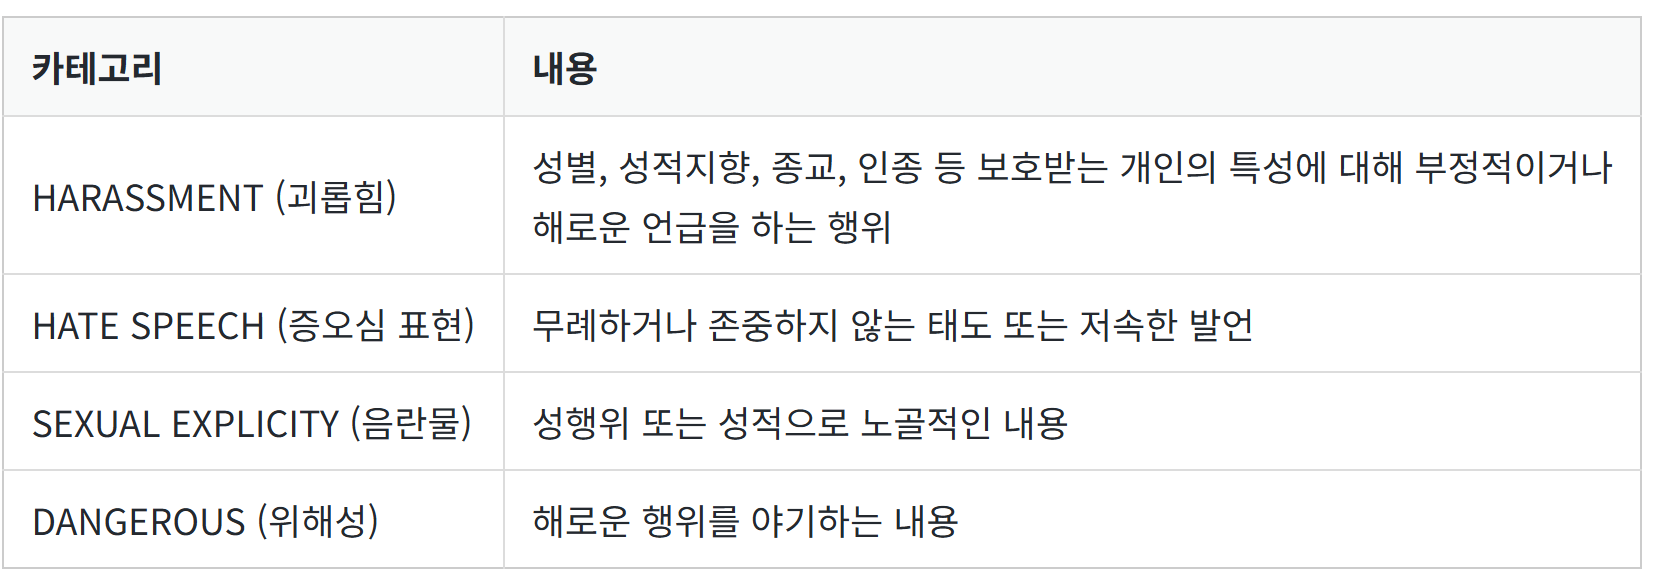

 한편 usage_metadata 필드에 담겨 있는 UsageMetadata 객체는 입력 토큰 prompt_token_count , 출력 토큰 candidate_token_count 입출력 전체 토큰 total_token_count 등 토큰 사용량을 담고 있습니다.

# **매개변수 설정하기**

언어모델의 동작은 학습 시점과 실행 시점 두 단계에 의해 결정됩니다. 학습 시점에는 가중치를 업데이트하는 방식으로 모델의 물리적 실체를 완성한다면, 추론 시점(실행 시점)에는 그렇게 만들어진 모델의 출력값을 조정함으로써 언어모델이 더욱 다양하게 반응하도록 돕습니다. 학습 시점에 업데이트되는 가중치(weights)와 출력값을 조정하는 설정값 모두 매개변수라고 부르지만, 여기서는 특별한 경우가 아니면 두 번째 의미로 매개변수라는 용어를 사용합니다.

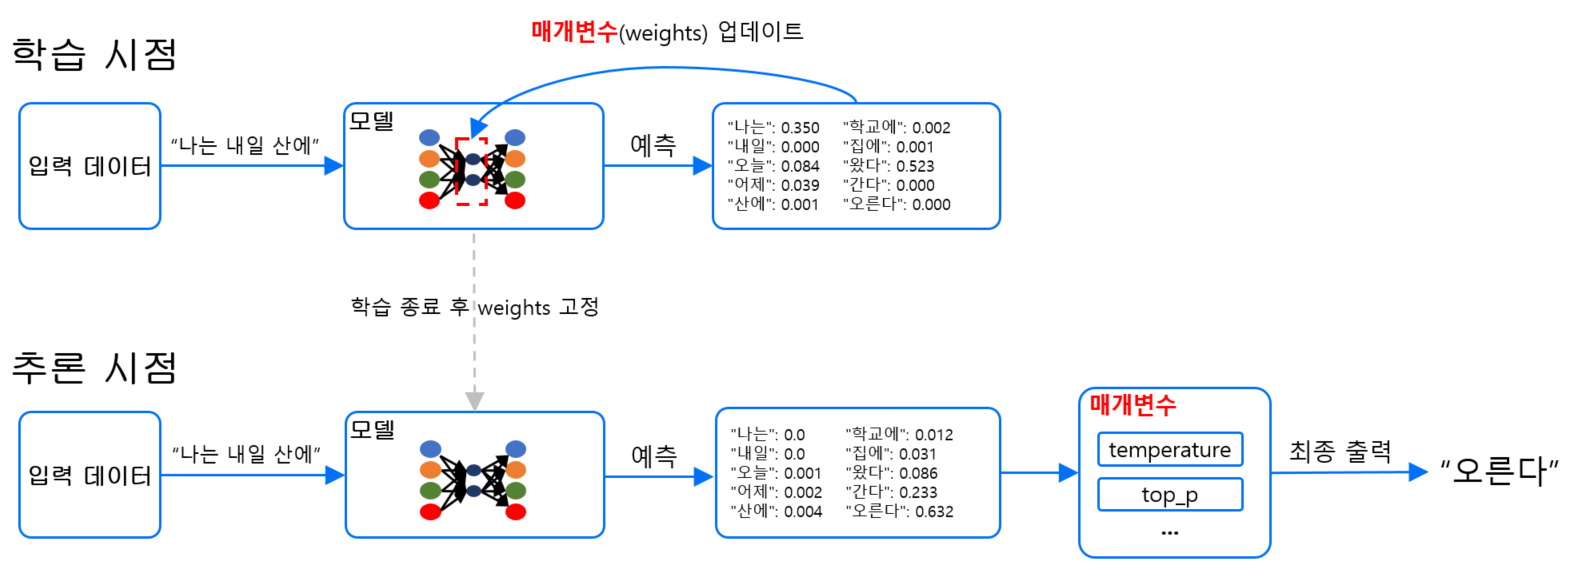

구글 제미나이 API에서 매개변수는 GenerationConfig 객체를 통해 설정됩니다. GenerationConfig 객체에는 모델의 응답 수인 candidate_count를 포함하여 총 6개의 매개변수가 있습니다.

참고로 업데이트되는 매개변수를 파라미터(parameter)라고 하고, 추론 시점에 사용되는 매개변수를 인퍼런스 파라미터(inference parameter)로 구분지어 부르기도 합니다.

# **매개변수 요약표**

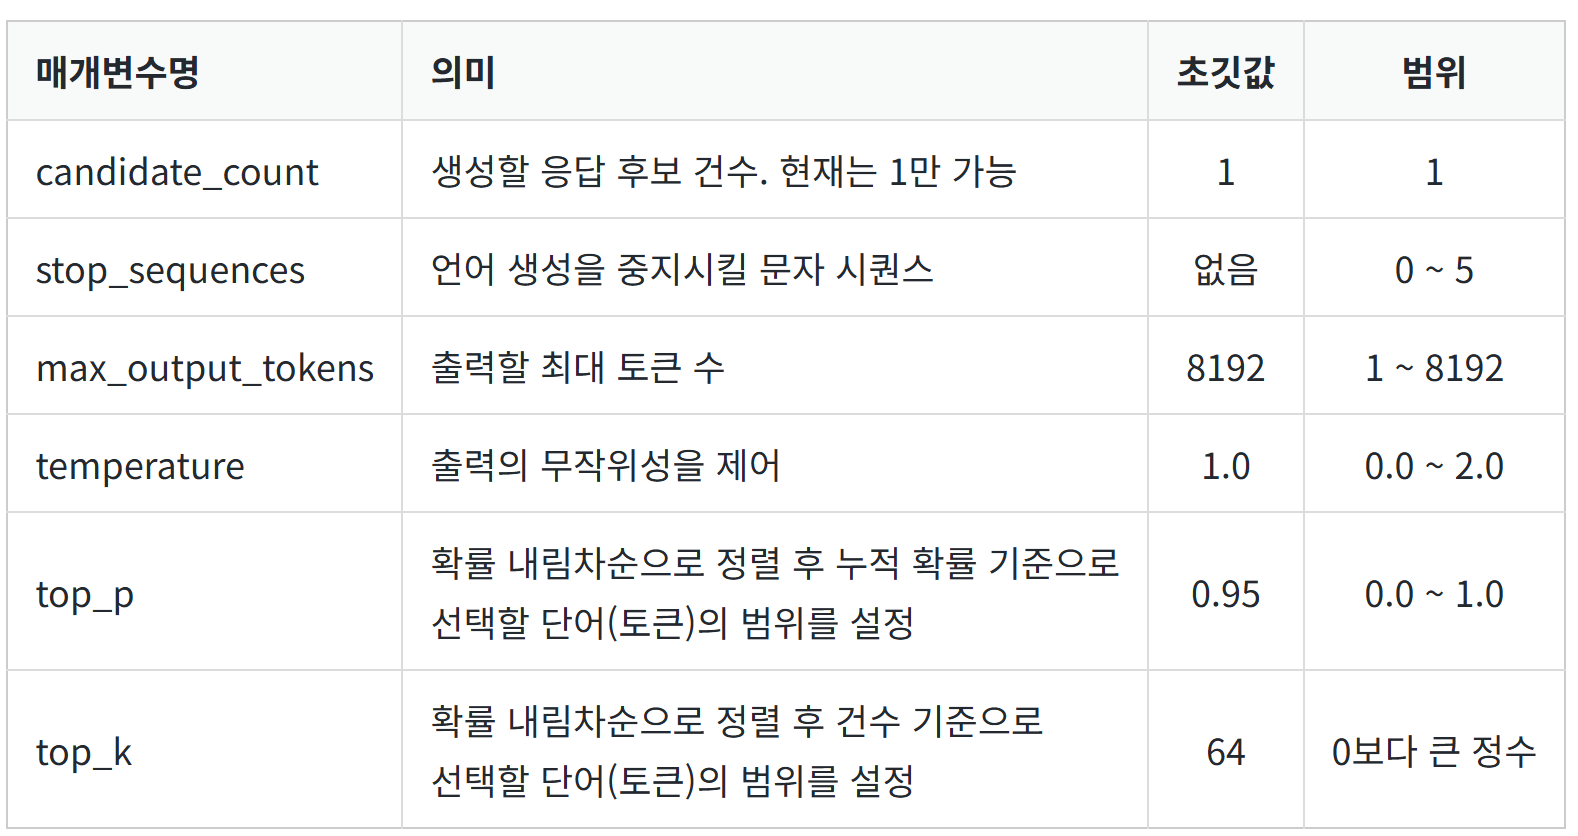

한편, 매개변수의 초깃값은 다음 명령으로 확인할 수 있습니다.

In [ ]:
print(genai.get_model("models/gemini-1.5-flash"))

Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description=('Alias that points to the most recent stable version of Gemini 1.5 Flash, our '
                   'fast and versatile multimodal model for scaling across diverse tasks.'),
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=40)


기본 모델은 전체 생성이 완료된 후 응답을 반환합니다. 그러나 다른 옵션을 통해 응답을 생성하는 동안 스트리밍할 수도 있습니다. 이는 모델이 생성되는 즉시 응답을 반환하는 방식입니다.

In [ ]:
response = model.generate_content("강원대 곰두리는 무엇인가요?", stream=True)
for chunk in response:
  print(chunk.text)
  print("_"*80)

강
________________________________________________________________________________
원대학교의 곰두리는 **강원대학교의 마스
________________________________________________________________________________
코트**입니다.  곰을 모티브로 하여 디자인되었
________________________________________________________________________________
으며, 대학의 상징으로 사용됩니다.  단순히 곰의 모습만을 한 것이 아니라,  강원도의 이미지
________________________________________________________________________________
와 강원대학교의 특징을 반영한 독창적인 디자인으로 보통 친근하고 귀여운 이미지로 표현됩니다.  
________________________________________________________________________________
하지만, 정확한 디자인은 시대에 따라 조금씩 변화가 있을 수 있습니다.

________________________________________________________________________________
